# Homework 2

In this homework, I'm going to use the Ames Housing Dataset from Kaggle to predict house prices in Ames, Iowa. First, I'll import and clean the data, and then I'll use a few different models to try to get the best predictions possible.

## Part 1: Import and clean the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import preprocessing

%matplotlib inline

train = pd.read_csv("/Users/alidoxey/Downloads/train.csv")
test = pd.read_csv("/Users/alidoxey/Downloads/test.csv")

all_data = pd.concat([train, test])

I'll start by looking at the data as a whole: how many rows and columns does it have? What kind of features are we using to predict housing prices? What are the summary statistics for the numerical data?

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Taking out the "Id" variable (which looks like just another index for each observation) and the dependent "SalePrice" variable, I have 79 features to predict housing prices. It looks like a fair amount of them are categorical or contain missing values, so I'll have to deal with that later. 

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


It looks like SalePrice's mean is much higher than its median, meaning the data for that variable must be skewed right. I'll plot it now to see roughly how skewed it is.

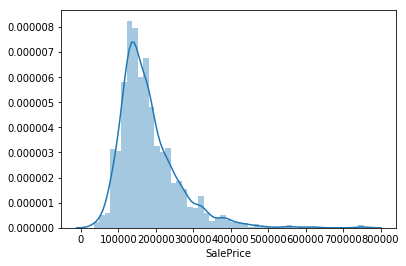

In [4]:
#graph a histogram of the housing prices in our training set
sns.distplot(train.SalePrice)

That looks really skewed. I'll have to normalize this (and the other variables in my data set) later on. But first, I'm going to move SalePrice outside out of the training set.

In [5]:
target = train.SalePrice

As I start making changes to the training set, I'll follow along with all_data (the training and test sets together) so that train and test have the same amount of variables later on. Mechanically, I could just make all of the changes to all_data and get the same result, but I want to avoid looking at the test set so that its contents won't influence how I clean the data. 

In [6]:
train.drop(['SalePrice'], axis = 1, inplace = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)

### Dealing With Missing Data

Now I'll move on to dealing with missing data. Below, I have a list of all the columns as well as a count of how many values in each column are non-missing.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It looks like a lot of the variables have missing values. After reading the descriptions of the variables that have the most missing values, I decided to drop a couple of them since they don't seem to provide very much useful information (for example, it doesn't make sense to hold onto only seven observations for pool quality).

In [8]:
# drop all variables for which more than 50% of the rows have missing values (from reading the data description, it 
# doesn't look like any of these variables would be essential to the analysis anyway)
train.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis = 1, inplace = True) 
all_data.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis = 1, inplace = True) 

In [9]:
# drop the 'Id' variable since it's just another index for each observation
train.drop(['Id'], axis = 1, inplace = True)
all_data.drop('Id', axis=1, inplace=True)

# save 'Id' outside of the test set so I can use it for my predictions CSV
test_ids = test['Id']

Next, I'll deal with my categorical variables. I'll try one hot encoding to add in binary variables for each category.

In [10]:
train = pd.get_dummies(train)
all_data = pd.get_dummies(all_data)

In [11]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


From what I've heard about one hot encoding, this has the advantage of being easy to do but also adds a lot of variables to the data set (in this example, it added about 200 additional features), which could lead to overfitting. I'll have to watch out for that in testing my models.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 275 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(239)
memory usage: 751.5 KB


In [13]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


In [14]:
# split train and test sets back up
train = all_data.iloc[:1460, :]
test = all_data.iloc[1461: , :]

In [15]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 275 entries, 1stFlrSF to Utilities_NoSeWa
dtypes: float64(11), int64(25), uint8(239)
memory usage: 762.8 KB


Now I'll check again to see how many rows have missing values after cleaning the data to this point.

In [18]:
# returns how many rows are totally filled in (no missing values)
len(train[train.notnull().all(axis=1)])

1121

Okay, so now most of the rows are completely filled in, but that's still not enough for me to drop all of the rows containing missing values. I'll have to start imputing values for the remaining missing data.

In [19]:
# Fill all missing numerical values with the mean of that column: I know this isn't ideal, but it's simple and may
    # be sufficient for the purpose of coming up with a model quickly
train = train.fillna(train.mean())

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 275 entries, 1stFlrSF to Utilities_NoSeWa
dtypes: float64(11), int64(25), uint8(239)
memory usage: 762.8 KB


Next, I'll impute a value of "None" for the rest of the missing categorical data. This should work if the other variables are similar to fireplace quality (such that a missing value means that that feature does not exist for a certain house).

In [25]:
#replace all missing categorical data with "None"
train = train.fillna("None")

### Scaling the Data

Now that everything has been filled in and converted to numeric data, it's time to scale the data. I've chosen to normalize it here.

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)

print(np.mean(train_scaled, 0))
print(np.std(train_scaled, 0))

[  6.50925280e-17  -1.82502415e-17   4.86673107e-18   2.14136167e-16
  -2.43336553e-17  -3.40671175e-17   2.31169726e-17   2.43336553e-17
  -6.60050401e-17  -2.31169726e-17  -4.86673107e-18   1.18018228e-16
  -1.21668277e-17   1.21668277e-16   3.93901046e-15  -1.27751691e-16
   2.08356924e-17   4.50172624e-16  -5.84007728e-17   4.07588727e-16
   1.21668277e-17  -8.45594523e-17  -3.40671175e-17  -2.67670209e-17
   7.54343315e-17   3.04170692e-17   3.54054685e-16   1.38701835e-16
   1.94669243e-17   5.47507245e-17  -1.02201352e-16   2.45769919e-16
   5.59674073e-17   1.04634718e-15   4.49685951e-15   3.56743554e-14
   3.16337519e-17  -4.38005796e-17   2.43336553e-17  -4.65381158e-17
   9.12512075e-17  -2.19002898e-17  -1.82502415e-17  -1.46001932e-17
   1.26535008e-16   9.12512075e-17  -5.11006762e-17   1.02201352e-16
  -9.24678903e-17   7.54343315e-17   9.73346213e-18  -3.65004830e-17
   5.35340417e-17   1.58168760e-17  -2.55503381e-17  -1.70335587e-17
   4.13672141e-17  -4.62339451e-17

The output above shows that each column now has a mean of zero and standard deviation of one, which will enable better modeling. I'll move on to that now after I've renamed the columns.

In [29]:
column_names = train.columns
train_scaled = pd.DataFrame(train_scaled, columns = column_names)
train_scaled.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,-0.793434,1.161852,-0.116339,0.163779,0.575425,-0.288653,1.107810,-0.241061,-0.944591,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
1,0.257140,-0.795163,-0.116339,0.163779,1.171992,-0.288653,-0.819964,3.948809,-0.641228,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
2,-0.627826,1.189351,-0.116339,0.163779,0.092907,-0.288653,1.107810,-0.241061,-0.301643,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
3,-0.521734,0.937276,-0.116339,0.163779,-0.499274,-0.288653,1.107810,-0.241061,-0.061670,4.092524,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
4,-0.045611,1.617877,-0.116339,1.390023,0.463568,-0.288653,1.107810,-0.241061,-0.174865,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618


## Part 2: Modeling

I'll start by looking at the relationship between SalePrice and LotArea. 

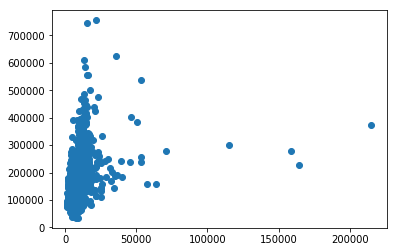

In [31]:
plt.scatter(train['LotArea'], target)

### Split the training data into train and test sets for cross-validation

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_scaled, target, test_size=0.2, random_state=42)

### Model 1: Linear Regression

#### Simple Linear Regression

In [34]:
# Code from Linear Regression lecture notes
lin_reg_scaled = SGDRegressor(tol=.0001, eta0=.01)
lin_reg_scaled.fit(X_train, y_train)
train_predictions_lin_reg = lin_reg_scaled.predict(X_train)
test_predictions_lin_reg = lin_reg_scaled.predict(X_test)

train_mse_lin_reg = mean_squared_error(y_train, train_predictions_lin_reg)
test_mse_lin_reg = mean_squared_error(y_test, test_predictions_lin_reg)

print("Train MSE: {}".format(train_mse_lin_reg))
print("Test MSE: {}".format(test_mse_lin_reg))

Train MSE: 60449107197.060905
Test MSE: 6614248236.485806


The MSE looks really high. I'll try another model and see if that does better.

### Model 2: K-Nearest Neighbors Regression

I'll use a grid search to find the best parameters for this model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

In [37]:
# Code from K Nearest Neighbors lecture notes
reg = KNeighborsRegressor()
knn_gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
knn_gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(knn_gridsearch.best_params_))
y_pred_train = knn_gridsearch.predict(X_train)
y_pred_test = knn_gridsearch.predict(X_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Train MSE: 0.0	Test MSE: 1443923630.6935542


This model's MSE is about 60 times less than the linear regression! I'll try submitting this one to Kaggle and see how it does.

### Submitting Results

In [42]:
# Step 1: Save test IDs (I did this already when I began cleaning the data)
#Step 2: Clean the test data in the same way I cleaned the training data

In [43]:
test = test.fillna(train.mean())

In [44]:
test = test.fillna("None")

In [45]:
scaler.fit(test)
test_scaled = scaler.transform(test)

In [46]:
test_column_names = test.columns
test_scaled = pd.DataFrame(test_scaled, columns = test_column_names)
test_scaled.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0.432764,-0.775679,-0.088857,0.175295,1.063065,-0.297449,-0.820014,-0.258579,-0.339777,-0.360878,...,-0.108616,-0.05245,-0.045408,-0.295378,-0.05245,0.399881,-0.064282,0.064282,0.037062,0.0
1,-0.574502,0.891291,-0.088857,0.175295,0.773026,-0.297449,-0.820014,-0.258579,-0.955272,-0.360878,...,-0.108616,-0.05245,-0.045408,-0.295378,-0.05245,0.399881,-0.064282,0.064282,0.037062,0.0
2,-0.579525,0.836597,-0.088857,0.175295,0.357743,-0.297449,-0.820014,-0.258579,-0.527400,-0.360878,...,-0.108616,-0.05245,-0.045408,-0.295378,-0.05245,0.399881,-0.064282,0.064282,0.037062,0.0
3,0.309682,-0.775679,-0.088857,-1.030270,-0.387129,-0.297449,-0.820014,-0.258579,1.058241,-0.360878,...,-0.108616,-0.05245,-0.045408,-0.295378,-0.05245,0.399881,-0.064282,0.064282,0.037062,0.0
4,-0.988963,1.345486,-0.088857,0.175295,-0.965010,-0.297449,-0.820014,-0.258579,0.477068,-0.360878,...,-0.108616,-0.05245,-0.045408,-0.295378,-0.05245,0.399881,-0.064282,0.064282,0.037062,0.0


In [47]:
train_scaled.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,-0.793434,1.161852,-0.116339,0.163779,0.575425,-0.288653,1.107810,-0.241061,-0.944591,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
1,0.257140,-0.795163,-0.116339,0.163779,1.171992,-0.288653,-0.819964,3.948809,-0.641228,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
2,-0.627826,1.189351,-0.116339,0.163779,0.092907,-0.288653,1.107810,-0.241061,-0.301643,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
3,-0.521734,0.937276,-0.116339,0.163779,-0.499274,-0.288653,1.107810,-0.241061,-0.061670,4.092524,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618
4,-0.045611,1.617877,-0.116339,1.390023,0.463568,-0.288653,1.107810,-0.241061,-0.174865,-0.359325,...,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.064238,0.064238,0.02618,-0.02618


In [48]:
# see how many more columns are in train_scaled than in test_scaled
set(train_scaled.columns).difference(set(test_scaled.columns))

set()

In [49]:
# Step 3: Make predictions
import pandas as pd
final_predictions = pd.DataFrame(columns = ['SalePrice'])

In [50]:
final_predictions.head()

,SalePrice


In [51]:
final_predictions = knn_gridsearch.predict(test_scaled)

In [52]:
test_ids = pd.DataFrame(test_ids)

In [54]:
test_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
Id    1459 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [55]:
test_ids.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [56]:
test_ids.tail()

,Id
1454,2915
1455,2916
1456,2917
1457,2918
1458,2919


In [57]:
print(len(final_predictions))

1458


In [58]:
print(len(test_ids))

1459


In [59]:
final_predictions = pd.DataFrame(final_predictions)

In [60]:
final_predictions.head()

,0
0,146306.960957
1,187860.946803
2,188187.111190
3,196487.087312
4,182259.017893


In [62]:
final_predictions.head()

,0
0,146306.960957
1,187860.946803
2,188187.111190
3,196487.087312
4,182259.017893


In [63]:
final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 1 columns):
0    1458 non-null float64
dtypes: float64(1)
memory usage: 11.5 KB


In [64]:
test_ids = test_ids.assign(SalePrice = final_predictions)

In [65]:
test_ids.head()

,Id,SalePrice
0,1461,146306.960957
1,1462,187860.946803
2,1463,188187.111190
3,1464,196487.087312
4,1465,182259.017893


In [66]:
# Step 4: Combine Test IDs and predictions
test_ids['SalePrice'] = final_predictions

In [67]:
test_ids.head()

,Id,SalePrice
0,1461,146306.960957
1,1462,187860.946803
2,1463,188187.111190
3,1464,196487.087312
4,1465,182259.017893


In [68]:
test_ids.tail()

,Id,SalePrice
1454,2915,88843.939476
1455,2916,137867.537599
1456,2917,114054.292957
1457,2918,194752.270275
1458,2919,NaN


In [69]:
test_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1458 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [70]:
# Step 5: Save to a CSV
test_ids.to_csv("submission6.csv", index = False)

In [72]:
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("SalePrice.csv", index = False)

I had some trouble getting everything formatted correctly, so at this point I just had to make separate CSVs for each variable and combine them manually. The first prediction was also lost at some point, so I also added in that value in Excel by taking the mean of the rest of the predictions.

Finally, I uploaded the CSV to Kaggle (no code for this). 

Success! I scored 3284th on my second attempt. If I had more time, I would spend more time fine-tuning the models (trying more hyper-parameters, or just more models like Random Forest, etc.) so that I could get a better score. To be honest, I wouldn't feel completely comfortable presenting this model to Zillow. At this point, I'm just happy to have come up with some fairly reasonable predictions.